In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,chi2

from keras.models import Sequential
from keras.layers import Activation,BatchNormalization
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
Data=pd.read_csv("Phishing.csv",header="infer")

In [2]:
x=Data.iloc [:,1:-1]
x=x.values
y=Data.iloc[:,-1].values

In [3]:
from sklearn import preprocessing
x1= preprocessing.normalize(x)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=42)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
clf_gini=DecisionTreeClassifier(criterion="gini", random_state=100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)
Y_pred=clf_gini.predict(x_test)
from sklearn import metrics
metrics.accuracy_score(y_test,Y_pred)*100 

91.40660334690185

In [6]:
import math
train_pred1=clf_gini.predict(x_train)
test_pred1=clf_gini.predict(x_test)
print(train_pred1)
print(test_pred1)

[ 1  1  1 ... -1  1 -1]
[-1 -1 -1 ... -1  1 -1]


In [7]:
import math
train_pred1=clf_gini.predict(x_train)
test_pred1=clf_gini.predict(x_test)

confusion_matrix_train1 = []
confusion_matrix_train1=confusion_matrix(y_train,train_pred1)
TP1 = confusion_matrix_train1[1,1]
TN1 = confusion_matrix_train1[0,0]
FP1 = confusion_matrix_train1[0,1]
FN1 = confusion_matrix_train1[1,0]

Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)

confusion_matrix_test1 = []
confusion_matrix_test1=confusion_matrix(y_test,test_pred1)
TP1 = confusion_matrix_test1[1,1]
TN1 = confusion_matrix_test1[0,0]
FP1 = confusion_matrix_test1[0,1]
FN1 = confusion_matrix_test1[1,0]
Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)


Accuracy :  90.63772048846675
Sensitivity :  90.90167278661771
Specificity :  90.30948756976154
F1 score :  91.49897330595482
Mattews correlation coefficient :  81.0909287924864
Accuracy :  91.40660334690185
Sensitivity :  92.11155378486056
Specificity :  90.48117154811716
F1 score :  92.40607513988809
Mattews correlation coefficient :  82.51271212073331


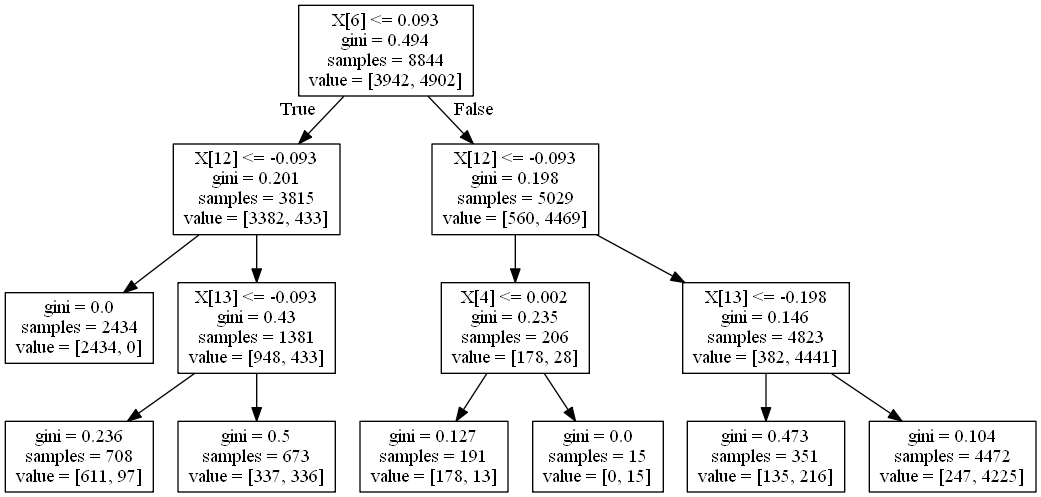

In [8]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data=tree.export_graphviz(clf_gini)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=42)
from sklearn.metrics import accuracy_score

In [10]:
maxdepths=[3,4,5,6,7,8,9,10,11,15,20,25,30,35,40,45,50,60]# alist contains
trainAcc=np.zeros(len(maxdepths))
testAcc=np.zeros(len(maxdepths))

In [11]:
index=0
for depth in maxdepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(x_train,y_train)
    y_predTrain=clf.predict(x_train)
    y_predTest=clf.predict(x_test)
    trainAcc[index]=accuracy_score(y_train,y_predTrain)
    testAcc[index]=accuracy_score(y_test,y_predTest)
    index +=1

Text(0, 0.5, 'Accuracy')

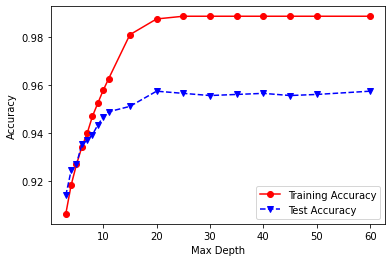

In [12]:

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
Data=pd.read_csv("Phishing.csv",header="infer")

In [15]:
x = Data.iloc[:,:-1].values #independent variables
y = Data.iloc[:,-1].values

In [16]:
Data.isnull()
Data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
pd.options.display.max_columns=None

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn import metrics
metrics.accuracy_score(y_test,Y_pred)*100 

51.9674355495251

In [19]:
import math
train_pred1=regressor.predict(x_train)
test_pred1=regressor.predict(x_test)
print(train_pred1)
train_pred1 = np.where(train_pred1 > 0.0, 1, -1)
print(train_pred1)
print(test_pred1)
test_pred1 = np.where(test_pred1 > 0.0, 1, -1)
print(test_pred1)

[ 0.71618074 -0.58208344 -0.82512151 ...  1.03728404 -0.66418516
  0.22638259]
[ 1 -1 -1 ...  1 -1  1]
[-0.36458813 -0.94940467  0.47266869 ... -0.27618963 -0.26077198
  0.94651359]
[-1 -1  1 ... -1 -1  1]


In [20]:
import math
train_pred1=regressor.predict(x_train)
test_pred1=regressor.predict(x_test)

train_pred1 = np.where(train_pred1 > 0.0, 1, -1)

confusion_matrix_train1 = []
confusion_matrix_train1=confusion_matrix(y_train,train_pred1)
print(confusion_matrix_train1)
TP1 = confusion_matrix_train1[1,1]
TN1 = confusion_matrix_train1[0,0]
FP1 = confusion_matrix_train1[0,1]
FN1 = confusion_matrix_train1[1,0]

Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)


test_pred1 = np.where(test_pred1 > 0.0, 1, -1)

confusion_matrix_test1 = []
confusion_matrix_test1=confusion_matrix(y_test,test_pred1)
print(confusion_matrix_test1)
TP1 = confusion_matrix_test1[1,1]
TN1 = confusion_matrix_test1[0,0]
FP1 = confusion_matrix_test1[0,1]
FN1 = confusion_matrix_test1[1,0]
Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)

[[3474  410]
 [ 270 4690]]
Accuracy :  92.31117141564903
Sensitivity :  94.55645161290323
Specificity :  89.44387229660144
F1 score :  93.24055666003976
Mattews correlation coefficient :  84.37395393526343
[[ 895  119]
 [  67 1130]]
Accuracy :  91.5875169606513
Sensitivity :  94.40267335004177
Specificity :  88.26429980276134
F1 score :  92.39574816026165
Mattews correlation coefficient :  83.08628361411839


In [21]:
Data = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

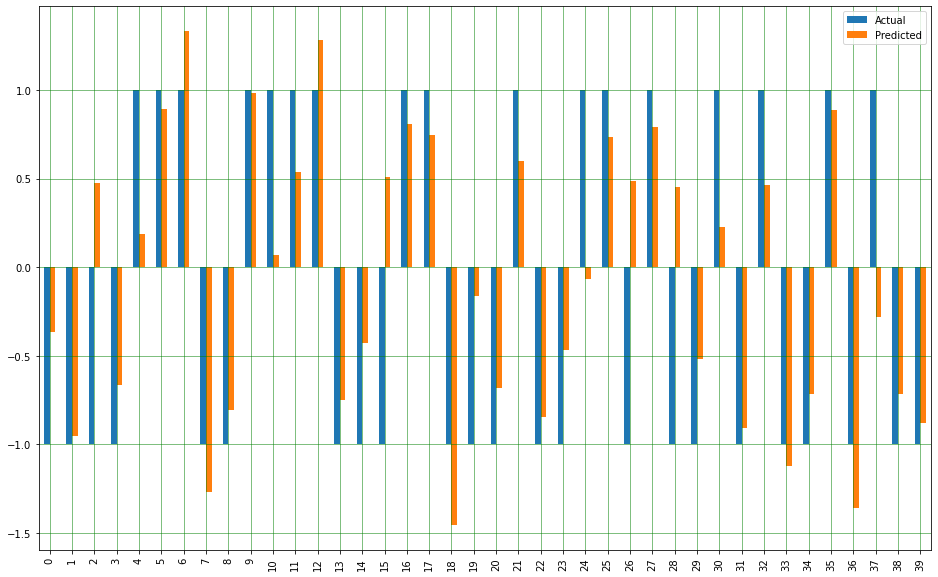

In [22]:
df1 = Data.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4190841065745994
Mean Squared Error: 0.307601513936276
Root Mean Squared Error: 0.5546183498012629


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
get_ipython().run_line_magic('matplotlib', 'inline')

In [25]:
Data=pd.read_csv("Phishing.csv",header="infer")

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)

In [27]:
pd.options.display.max_columns=None
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
numNeighbours=[1,5,10,15,20,25,30]
trainAcc=[]
testAcc=[]

In [33]:
train_tp = []
train_tn = []
train_fp = []
trian_fn = []


test_tp = []
test_tn = []
test_fp = []
test_fn = []



for k in numNeighbours:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    clf.fit(x_train,y_train)
    
    y_predTrain=clf.predict(x_train)
    confusion_matrix_train1 = []
    confusion_matrix_train1=confusion_matrix(y_train,y_predTrain)
    #print(confusion_matrix_train1)
    train_tp.append(confusion_matrix_train1[1,1])
    train_tn.append(confusion_matrix_train1[0,0])
    train_fp.append(confusion_matrix_train1[0,1])
    trian_fn.append(confusion_matrix_train1[1,0])
    #Accuracy=((train_tp+train_tn)/float(train_tp+train_tn+train_fp+trian_fn))  ##Accuracy
    #print("Accuracy : ",Accuracy*100)
    
    y_predTest=clf.predict(x_test)
    confusion_matrix_test1 = []
    confusion_matrix_test1=confusion_matrix(y_test,y_predTest)
    #print(confusion_matrix_test1)
    test_tp.append(confusion_matrix_test1[1,1])
    test_tn.append(confusion_matrix_test1[0,0])
    test_fp.append(confusion_matrix_test1[0,1])
    test_fn.append(confusion_matrix_test1[1,0])
    
    trainAcc.append(accuracy_score(y_train,y_predTrain))
    testAcc.append(accuracy_score(y_test,y_predTest))
    
    
print(train_tp)
print(train_tn)
print(train_fp)
print(trian_fn)
print(test_tp)
print(test_tn)
print(test_fp)
print(test_fn)


[4900, 4812, 4694, 4730, 4659, 4694, 4672]
[3841, 3711, 3712, 3619, 3624, 3580, 3566]
[61, 191, 190, 283, 278, 322, 336]
[42, 130, 248, 212, 283, 248, 270]
[1172, 1152, 1128, 1140, 1114, 1117, 1124]
[945, 926, 935, 913, 918, 901, 900]
[51, 70, 61, 83, 78, 95, 96]
[43, 63, 87, 75, 101, 98, 91]


In [34]:
from statistics import mean
TP1 = mean(train_tp)
TN1 = mean(train_tn)
FP1 = mean(train_fp)
FN1 = mean(trian_fn)

Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)


TP1 = mean(test_tp)
TN1 = mean(test_tn)
FP1 = mean(test_fp)
FN1 = mean(test_fn)

Accuracy=((TP1+TN1)/float(TP1+TN1+FP1+FN1))  ##Accuracy
Sensitivity=(TP1/float(TP1+FN1))             ##Sensitivity
Specificity=(TN1/float(TN1+FP1))             ##Specificity
F1=((2*TP1)/float((2*TP1)+FP1+FN1))     ## F1 score
sqr1 = (TP1+FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1)
MCC=(((TP1*TN1)-(FP1*FN1))/math.sqrt(sqr1)) ##Mattews correlation coefficient
print("Accuracy : ",Accuracy*100)
print("Sensitivity : ",Sensitivity*100)
print("Specificity : ",Specificity*100)
print("F1 score : ",F1*100)
print("Mattews correlation coefficient : ",MCC*100)


Accuracy :  95.01244062429315
Sensitivity :  95.87128111718276
Specificity :  93.92463470904896
F1 score :  95.55219364599093
Mattews correlation coefficient :  89.87850979186489
Accuracy :  92.98325033952014
Sensitivity :  93.49258649093905
Specificity :  92.36180904522612
F1 score :  93.6082474226804
Mattews correlation coefficient :  85.83137629059601
